## Case Study EDA: Liver disease prediction
    

The following notebook performs EDA on a given dataset about patients in an attempt to understand the relationship between biomarkers and the general characteristics of a human, and the possibility of the human having liver disease.

Importing required libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the data into a pandas dataframe:

In [2]:
df = pd.read_csv('indian liver Patient.csv')

Displaying the first and last 5 rows of the dataframe:

In [3]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


Getting basic information about the dataframe:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  is_patient                  583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


As can be seen, the column with the albumin and globulin ratio has 4 null values. Since this column data is floating point type and only 4 null values are observed, the corresponding rows can be removed.

The same may be verified from the descriptive statistics as well.

In [5]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,is_patient
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


This also shows the same, 4 null values in the above mentioned column.

Finally, we may verify the same using the .isnull() function.

In [6]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
is_patient                    0
dtype: int64

The rows with the null values are removed by the following step:

In [7]:
df = df[df['Albumin_and_Globulin_Ratio'].notnull()]

Next, it is checked if all the column names are alright.

In [8]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'is_patient '],
      dtype='object')

The column name 'is_patient ' has a space at the end which is not required and inconvenient. The space is removed and the column is renamed:

In [9]:
df.rename({'is_patient ': 'is_patient'}, axis = 1, inplace = True)

/var/folders/14/s4mt50511sj2qhbnf90qvt5h0000gn/T/ipykernel_1013/288492394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename({'is_patient ': 'is_patient'}, axis = 1, inplace = True)


Verifying that the name has been changed:

In [10]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'is_patient'],
      dtype='object')

The column 'is_patient' is supposed to have just two values - 1 and 2. Verifying if any other values exist in the column:

In [25]:
df[(df['is_patient'] != 1) & (df['is_patient'] != 2)]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,is_patient


No such rows exist.

### Univariate, bivariate and multivariate analyses:

A boxplot of one of the biomarkers in which an abnormally high maximum value was observed is seen:

<AxesSubplot:>

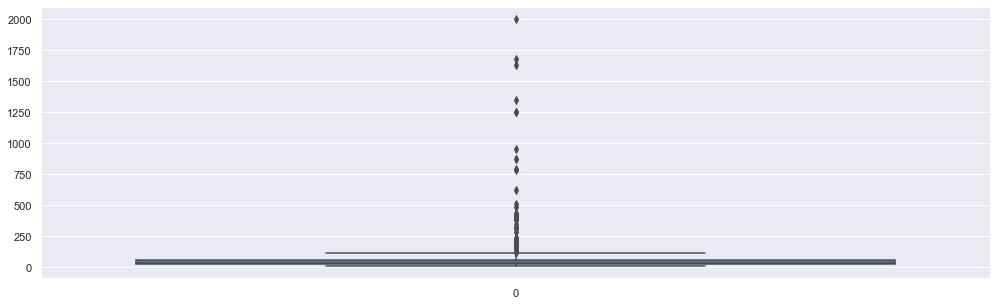

In [27]:
sns.boxplot(data = df['Alamine_Aminotransferase'])

The boxplot shows that there are a significant number of outliers. However, since the absolute possible maximum values of these biomarkers are not known and the dataset is relatively small, for the preliminary EDA, the outliers are not removed.

#### Correlation heatmap

Seeing the correlation between various columns:

<AxesSubplot:>

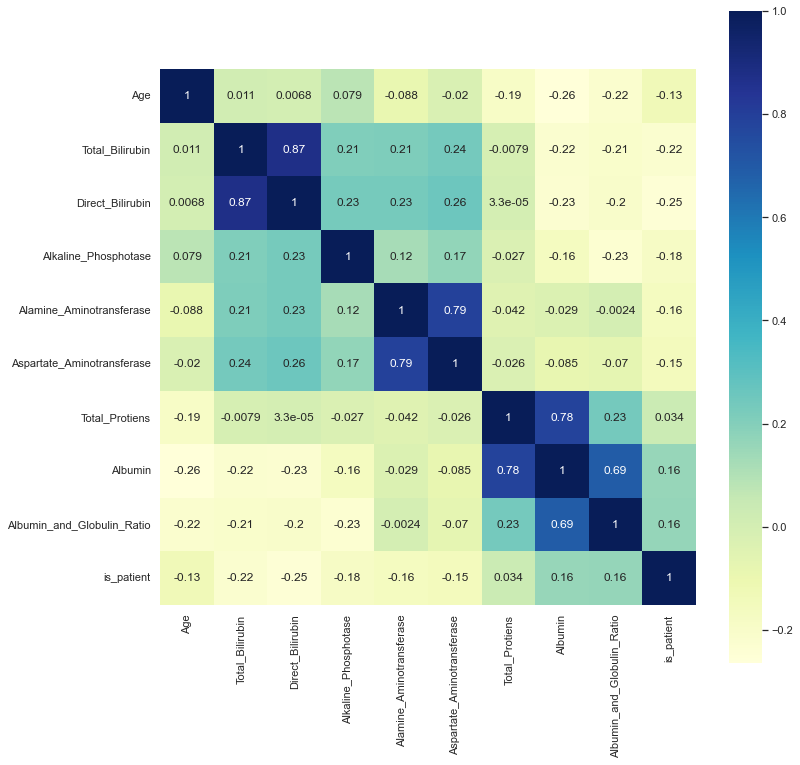

In [45]:
sns.set(rc = {'figure.figsize': (12, 12)})

corr = df.corr()
sns.heatmap(data = corr, square = True, annot = True, cbar = True, cmap = 'YlGnBu')

This heatmap only helps in knowing the relationships between numerical variables. One cannot glean anything from the correlation values associated with the 'is_patient' variable from this heatmap.

As can be naturally expected, higher correlations exist between albumin and total proteins, albumin and albumin_and_globulin_ratio, aspartate and alamine aminotransferases, direct and total bilirubin. This may be useful in feature selection later.

#### Gender and liver disease

Fraction of diseased females:

In [28]:
len(df[(df['Gender'] == 'Female') & (df['is_patient'] == 1)])/len(df[(df['Gender'] == 'Female')])

0.65

Fraction of diseased males:

In [29]:
len(df[(df['Gender'] == 'Male') & (df['is_patient'] == 1)])/len(df[(df['Gender'] == 'Male')])

0.7357630979498861

As can be seen, the percentage of diseased males is greater than the percentage of diseased females. This indicates a greater likelihood of males getting liver diseases than females.

The same can be understood visually by the following plots.

<AxesSubplot:xlabel='Gender', ylabel='Percent'>

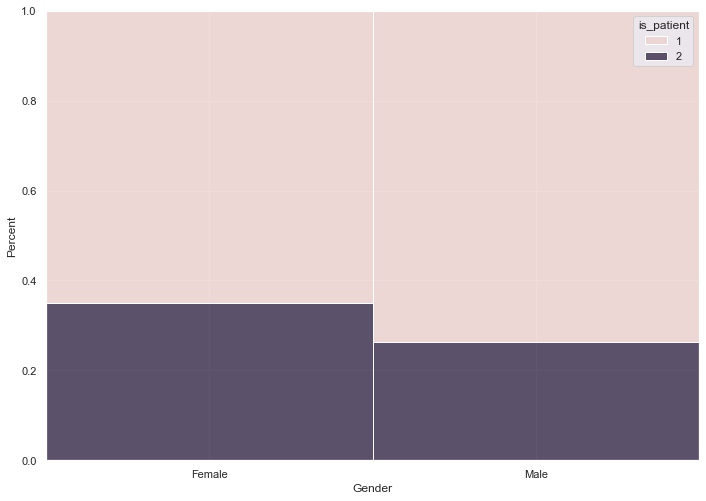

In [32]:
sns.histplot(data = df, x = "Gender", hue = "is_patient", stat = 'percent', multiple = 'fill')

#### Age and liver disease

<AxesSubplot:xlabel='Age', ylabel='Count'>

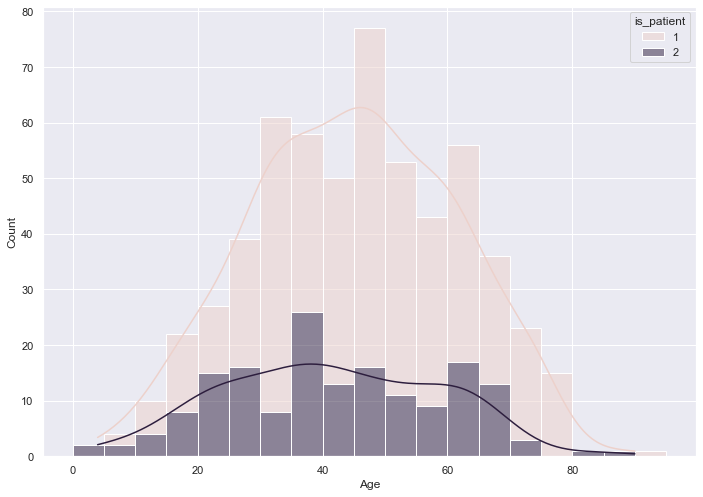

In [21]:
bins = [5*i for i in range(20)]
sns.histplot(data = df, x = "Age", hue = "is_patient", multiple = 'stack', bins = bins, kde = True)

Although at first look, it looks as if liver disease is highest in middle-aged patients (aged 40 to 60), it must be noted that the plot above has the count on the y-axis which may be misleading if the number of observations in each bin are not equal. Therefore, it is more informative if percentages are plotted on the y-axis instead of the absolute counts.

<AxesSubplot:xlabel='Age', ylabel='Percent'>

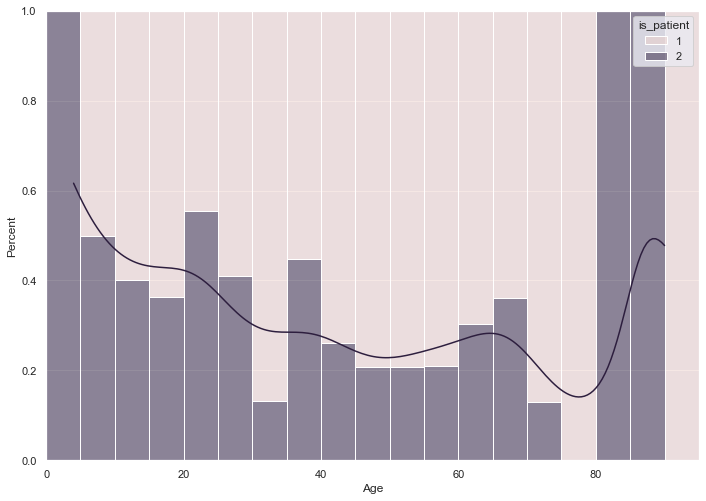

In [33]:
bins = [5*i for i in range(20)]
sns.histplot(data = df, x = "Age", hue = "is_patient", stat = 'percent', multiple = 'fill', bins = bins, kde = True)

This revised plot indicates that as age increases, the likelihood of liver disease increases. There are exceptions to the general trend which may be due to a small dataset or a well-defined scientific reason. It is difficult to ascertain the exact cause at this point in the analysis.

#### Biomarkers and liver disease

In the diseased patients, for each biomarker, the values are plotted as a histogram to identify ranges where the likelihood of having liver disease is highest. The x-axis uses a log scale since due to the presence of outliers, in some cases, the values span multiple orders of magnitude.

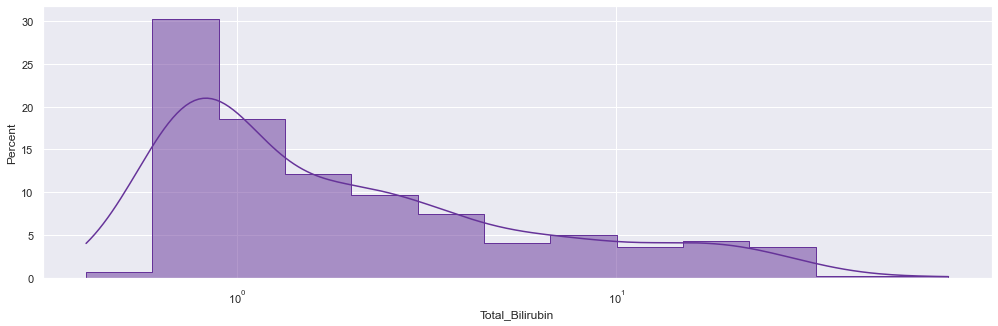

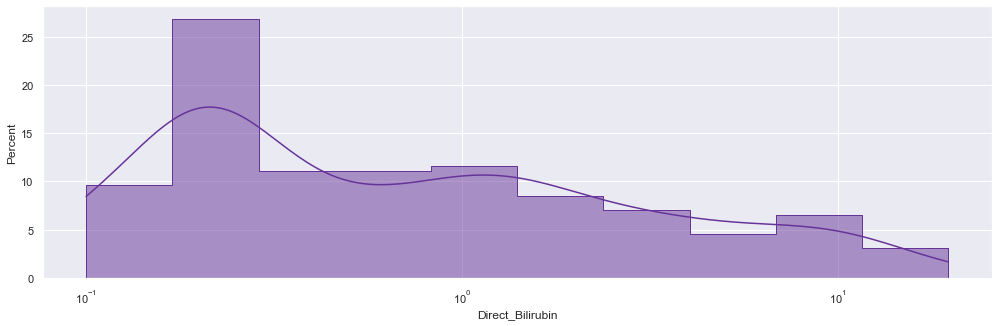

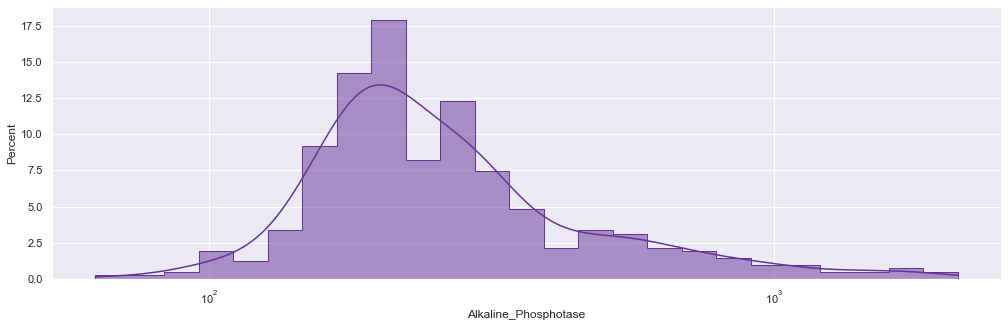

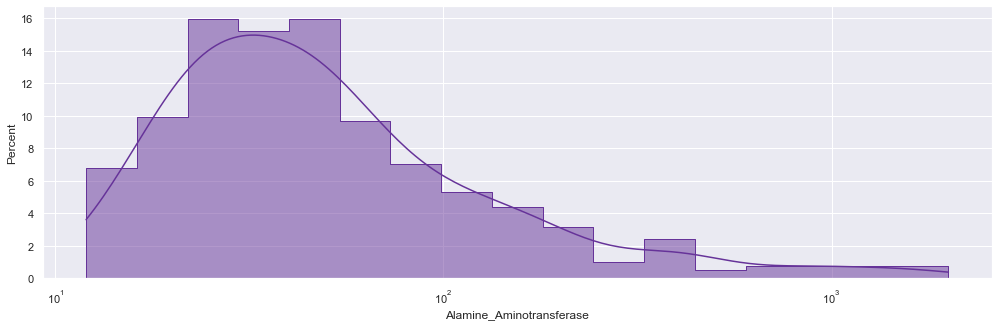

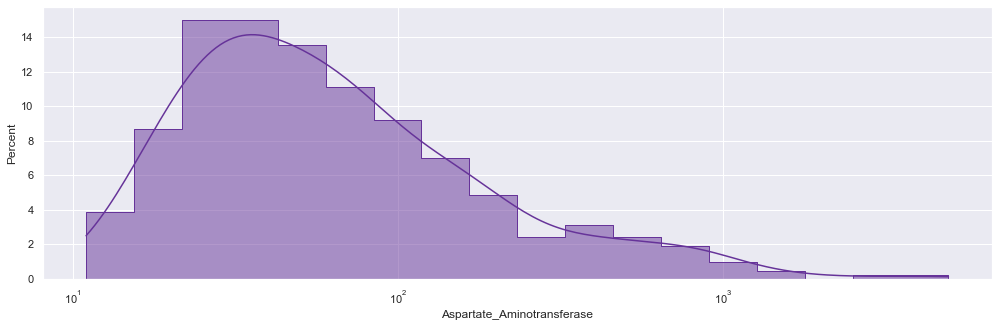

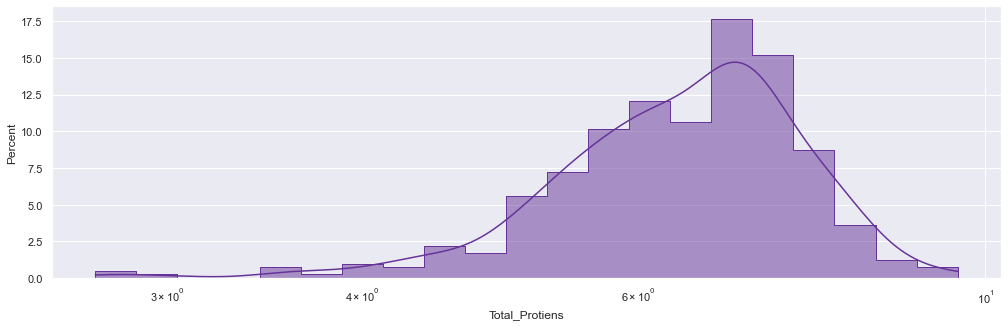

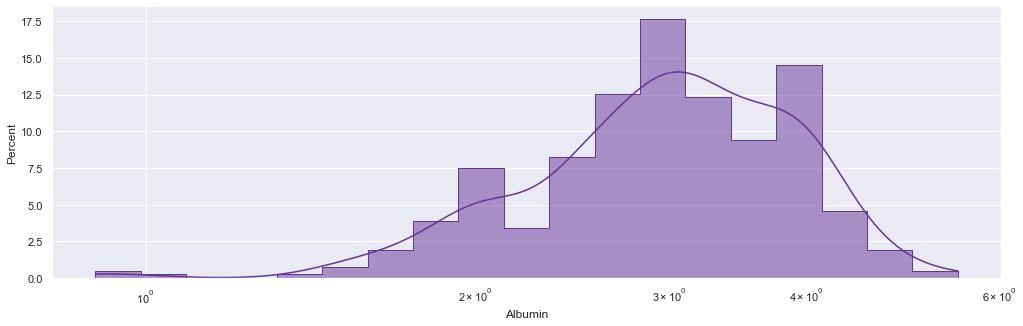

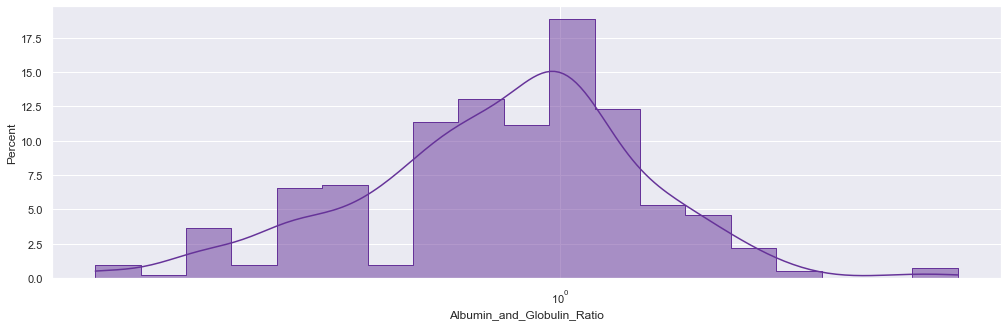

In [44]:
for i in range(2, 10):
    sns.set(rc = {'figure.figsize': (17, 5)})
    sns.histplot(data = df[(df['is_patient'] == 1)], x = df.columns[i], stat = 'percent', element = 'step', kde = True, log_scale = True, color = 'rebeccapurple')
    plt.show()

Since the above plots show the data corresponding to diseased patients without a reference range, it is not possible to draw straightforward conclusions about the values of the biomarkers and likelihood of having liver disease. It may so happen that the largest fraction of diseased people have bilirubin in the range (5, 7) but it may also be that this is the case for all humans in general. Therefore, it is important to see the values of the biomarkers of diseased people and non-diseased people in the same plot to make comparisons.

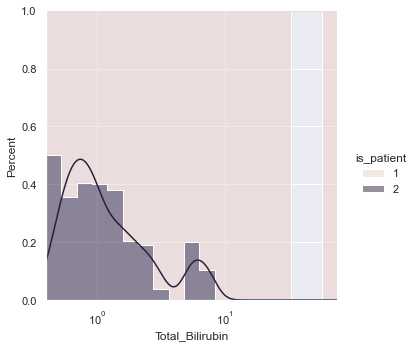

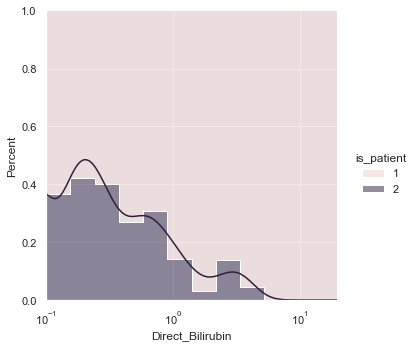

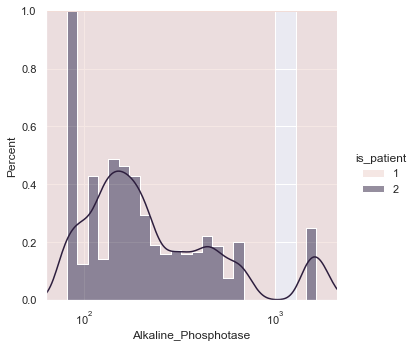

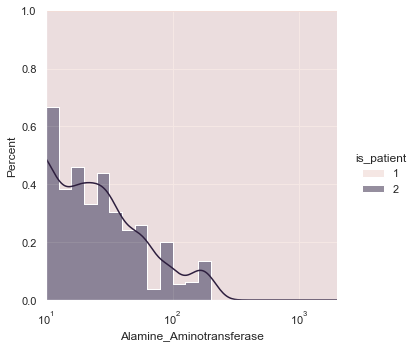

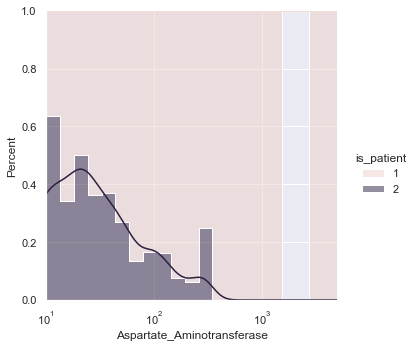

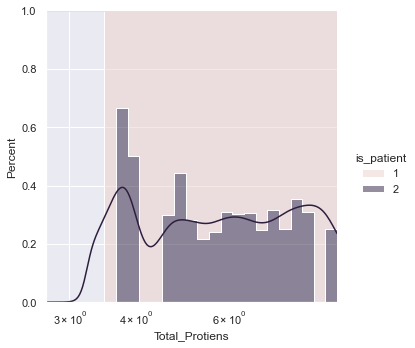

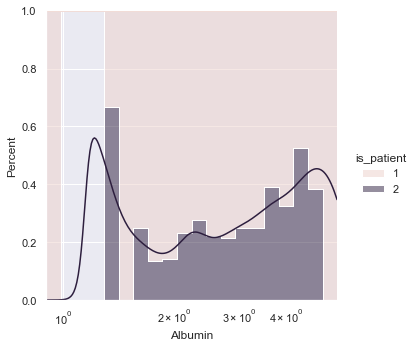

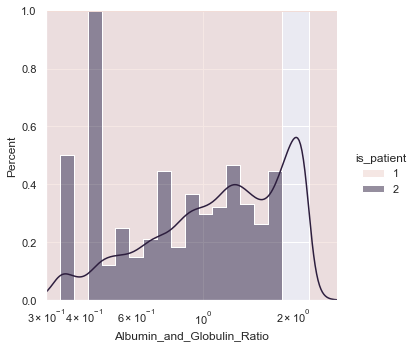

In [59]:
for i in range(2, 10):
    sns.set(rc = {'figure.figsize': (17, 5)})
    sns.displot(data = df, x = df.columns[i], stat = 'percent', hue = 'is_patient', multiple = 'fill', element = 'step', kde = True, log_scale = True)
    plt.show()

These plots demonstrate the 'normal' values of the biomarkers against abnormal values.

Except for protein-related markers, generally speaking, the higher the biomarker value, the greater is the likelihood of liver disease.

For each biomarker, we may identify the approximate value beyond which the percentage of diseased people is higher than that of non-diseased people for a given value of the biomarker. This value could be defined as an empirical threshold beyond which the likelihood of liver disease begins increasing significantly.

Empirical thresholds:

1. Total bilirubin: 0.5

2. Direct bilirubin: No such threshold may be ascertained since the percentage of diseased patients is greater than that of non-diseased patients for all values of the biomarker.

3. Alkaline phosphotase: 200

4. Alamine aminotransferase: 20

5. Aspartate aminotransferase: 30

It can be verified from the univariate plots showing the distribution of diseased patients w.r.t the biomarker values that the maximum number of diseased people indeed have biomarkers higher than the empirical thresholds identified above.